In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [6]:
df= pd.read_csv('Churn_Modelling.csv')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.duplicated().sum()

0

In [11]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [12]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [13]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [14]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [20]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [21]:
X=df.drop(['Exited'],axis=1)
y=df['Exited']

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=84)
x_train.shape, y_train.shape, x_test.shape,y_test.shape

((8000, 11), (8000,), (2000, 11), (2000,))

In [73]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [74]:
x_test_scaled

array([[-1.15937727, -0.07545765, -1.38538004, ..., -0.57812007,
         1.83229323, -1.08456377],
       [-0.61239653, -0.91855992, -0.36094323, ..., -0.57812007,
        -0.54576417, -1.08456377],
       [-0.69495966, -0.82488189, -1.04390111, ..., -0.57812007,
        -0.54576417,  0.9220297 ],
       ...,
       [-1.19033844, -0.91855992,  0.66349357, ..., -0.57812007,
        -0.54576417,  0.9220297 ],
       [-0.66399849,  1.42339082,  1.00497251, ..., -0.57812007,
        -0.54576417,  0.9220297 ],
       [ 1.85417697, -1.10591598,  1.34645144, ...,  1.72974448,
        -0.54576417, -1.08456377]])

In [75]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [100]:
model = Sequential()

model.add(Dense(11,activation ='relu',input_dim =11))
model.add(Dense(11,activation ='relu'))
model.add(Dense(1,activation ='sigmoid' ))

In [101]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 11)                132       
                                                                 
 dense_18 (Dense)            (None, 11)                132       
                                                                 
 dense_19 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [102]:
# model compile
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics =['accuracy'])

In [103]:
history =model.fit(x_train_scaled , y_train ,epochs =100 , validation_split =0.2)

Epoch 1/100
200/200 [==============================] - 4s 8ms/step - loss: 0.4955 - accuracy: 0.7847 - val_loss: 0.4471 - val_accuracy: 0.8119
Epoch 2/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4375 - accuracy: 0.8097 - val_loss: 0.4284 - val_accuracy: 0.8163
Epoch 3/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4239 - accuracy: 0.8150 - val_loss: 0.4198 - val_accuracy: 0.8156
Epoch 4/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4158 - accuracy: 0.8167 - val_loss: 0.4125 - val_accuracy: 0.8181
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4086 - accuracy: 0.8194 - val_loss: 0.4064 - val_accuracy: 0.8200
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4004 - accuracy: 0.8227 - val_loss: 0.3999 - val_accuracy: 0.8269
Epoch 7/100
200/200 [==============================] - 1s 7ms/step - loss: 0.3928 - accuracy: 0.8286 - val_loss: 0.3936 - val_accuracy: 0.8350

Epoch 58/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3206 - accuracy: 0.8677 - val_loss: 0.3372 - val_accuracy: 0.8669
Epoch 59/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3204 - accuracy: 0.8680 - val_loss: 0.3390 - val_accuracy: 0.8644
Epoch 60/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3206 - accuracy: 0.8661 - val_loss: 0.3383 - val_accuracy: 0.8644
Epoch 61/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3207 - accuracy: 0.8670 - val_loss: 0.3381 - val_accuracy: 0.8662
Epoch 62/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3201 - accuracy: 0.8667 - val_loss: 0.3388 - val_accuracy: 0.8637
Epoch 63/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3201 - accuracy: 0.8683 - val_loss: 0.3413 - val_accuracy: 0.8606
Epoch 64/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3199 - accuracy: 0.8666 - val_loss: 0.3383 - val_accuracy:

In [104]:
model.layers[0].get_weights()

[array([[-0.04078183, -0.05230419, -0.0732091 ,  0.11623257, -0.0458874 ,
          0.04426369, -0.20154484, -0.24625249,  0.06577488,  0.04087884,
         -0.01731564],
        [-0.05176664,  1.1152045 , -0.27524415, -0.29493013, -0.53222555,
          0.09056042,  0.22141728,  0.75009096, -0.6576702 ,  0.01583589,
          0.13829894],
        [-0.02176651, -0.029869  , -0.22147848,  0.2818207 , -0.07538566,
         -0.07656015,  0.19435357,  0.0511106 , -0.15333751, -0.16614851,
         -0.36727145],
        [-0.04242459, -0.6523017 , -0.19848248, -0.29193255, -0.65000623,
          0.07594548,  0.36600396,  0.54027617, -0.57779837, -0.2797221 ,
          0.74700487],
        [-0.0748937 ,  0.2209438 ,  0.20660862,  0.18741156, -0.39040595,
          1.2890859 , -0.16418745,  0.35778075,  0.32010955, -1.213291  ,
         -0.6349051 ],
        [ 0.21917276,  0.09005422, -0.1469002 ,  0.69322556, -0.2685087 ,
          0.06239401,  0.14410338,  0.04041641, -0.17978272, -0.0417024

In [105]:
model.layers[1].get_weights()  # weights and bias

[array([[-0.27856004,  0.17252065, -0.15114982,  0.5613519 , -0.07140926,
          0.5023316 ,  0.3575263 , -0.3427366 ,  0.19605017, -0.24945472,
         -0.02052685],
        [-0.15679596,  0.68073815, -0.34079808, -0.7505202 ,  0.5356411 ,
         -0.5970318 , -0.4811794 , -0.43312576,  0.20551144,  0.44211707,
          0.6614423 ],
        [ 0.1732329 , -0.1138202 , -0.33947682,  0.26020464, -0.28332546,
          0.54036963,  0.2564247 , -0.19783193, -0.20895112, -1.240938  ,
         -0.2408824 ],
        [-0.28387424,  0.26350474, -0.2437096 ,  0.33178148,  0.13009807,
          0.49263266, -0.09771401, -0.13239   ,  0.53157175,  0.2636132 ,
          0.32923314],
        [ 0.43595976, -0.390036  , -1.2362617 ,  0.42836076,  0.0093829 ,
          0.23103774,  0.42554602,  0.5599785 , -0.00941707,  0.06788646,
          0.01860349],
        [ 0.19414292, -1.0931486 , -0.82784265, -0.2184932 ,  1.2297657 ,
         -0.28023008, -0.01645883, -0.9804656 , -0.14287458, -0.4529372

In [106]:
model.predict(x_test_scaled)

63/63 [==============================] - 0s 3ms/step


array([[0.02113755],
       [0.02254627],
       [0.00413914],
       ...,
       [0.06211234],
       [0.15377371],
       [0.19182889]], dtype=float32)

In [107]:
y_log =model.predict(x_test_scaled)

63/63 [==============================] - 0s 3ms/step


In [108]:
y_pred=np.where(y_log > 0.5 ,1,0)

In [109]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.849

In [110]:
history.history

{'loss': [0.49550652503967285,
  0.4375097155570984,
  0.42388659715652466,
  0.41576099395751953,
  0.4086102247238159,
  0.4004288613796234,
  0.3928127586841583,
  0.38512539863586426,
  0.37672001123428345,
  0.3696977496147156,
  0.3620505928993225,
  0.35653313994407654,
  0.35145244002342224,
  0.3475389778614044,
  0.3433515131473541,
  0.340688556432724,
  0.3382663428783417,
  0.3367113769054413,
  0.33481213450431824,
  0.3338891565799713,
  0.33317142724990845,
  0.33237889409065247,
  0.3316449820995331,
  0.3308885991573334,
  0.32936763763427734,
  0.32928967475891113,
  0.32870444655418396,
  0.32783806324005127,
  0.3284279704093933,
  0.32726815342903137,
  0.3266388773918152,
  0.3262838125228882,
  0.32553723454475403,
  0.3251003324985504,
  0.32525235414505005,
  0.32520824670791626,
  0.3250177502632141,
  0.3249106705188751,
  0.32430434226989746,
  0.3240931034088135,
  0.32382991909980774,
  0.323203444480896,
  0.3236076831817627,
  0.3229023218154907,
  0.32

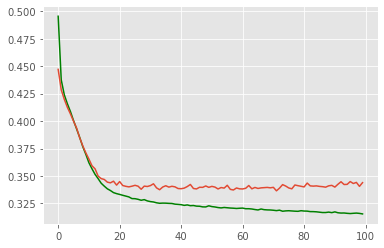

In [111]:
plt.plot(history.history['loss'] ,color='green')
plt.plot(history.history['val_loss'])

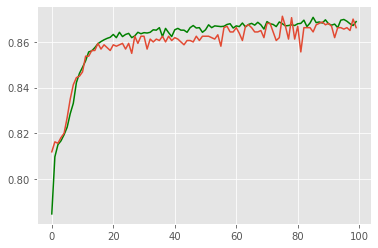

In [112]:
    plt.plot(history.history['accuracy'] ,color='green')
    plt.plot(history.history['val_accuracy'])